---
# **Sentiment Analysis**: Sentiment Analysis on GameSphere Game Reviews
---
## **Problem Statement**:


- GameSphere, a premier digital distribution platform for video games, stands at the forefront of the gaming industry by bridging a global community of gamers.
- It hosts a vast collection of games, encouraging users to leave reviews and share recommendations within the community.
- These reviews are crucial for feedback to developers and guide potential buyers in their decisions.
- Automatically analyzing and classifying the sentiment of these reviews as positive (recommended) or negative (not recommended) can offer invaluable insights into a game's acceptance and its overall standing among users.

## **Aim**:
- The main objective of this project is to build a smart model that can correctly figure out what a review is saying about a game on GameSphere.
- The model will look at the review text and other game info to decide if a review recommends the game. Moreover, the model will calculate **how likely a review is to be positive**.
- This detailed approach helps GameSphere better understand and organize game reviews from the internet, giving a clearer view of how popular and well-received games are.
- By doing this, we're not just seeing if people like a game but how much they like it, making our analysis more precise.


## **Dataset Attributes**:


- **review_id**: A unique identifier for each review, used to distinguish between different reviews.
- **title**: The name of the game that the review is about.
- **developer**: The name of the company or individual who developed the game.
- **publisher**: The name of the company that published the game, making it available to the public.
- **tags**: A list of categories or genres associated with the game, such as 'Free to Play', 'Strategy', 'Multiplayer', etc., which give a general idea of the game's nature.
- **overview**: A brief description or summary of the game, providing insight into its content or storyline.
- **year**: The year in which the game was released, indicating its age.
- **user_review**: The actual text of the user's review, where the reviewer shares their thoughts and opinions about the game.
- **sentiment**: Indicates the reviewer's overall sentiment towards the game, categorized as 'Positive' or 'Negative'.

- **PositiveSentimentProbability**: This is the target variable and it represents the probability that a game review expresses a positive sentiment towards the game. A probability closer to 0 indicates that the sentiment will be negative and a probability closer to 1 indicates a positive sentiment.

### **Hint**: **PositiveSentimentProbability** variable is not in the dataset. You simply have to predict the probability of the positive class (Using your best chosen model) and return that probability as your final submission.



---
# **Load dataset**
---

### Import Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.decomposition import PCA
import ast
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report
import re
import string
from sklearn.pipeline import Pipeline
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier
# Import other modules as per your convenience

In [46]:
data=pd.read_csv("C:/Users/sreev/OneDrive/Documents/AI/final/Problem1/data/train.csv")
data

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE®,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",Enter the Battleground of the GodsJoin the mil...,2016.0,"I've played this game since before beta ended,...",Positive
1,15427,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2018.0,"fun little game , but you really need to put a...",Positive
2,8236,Neverwinter,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,First of all this is not a pay to win game. ZE...,Positive
3,3805,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2014.0,this game have all very funny and tactical...,Positive
4,17261,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...,2017.0,"This is a great game, it really is. I understa...",Positive
...,...,...,...,...,...,...,...,...,...
17314,12056,Bless Online,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",“We invite you all to the world of Bless Onlin...,2018.0,Played for roughly 2 hours. The best part of ...,Negative
17315,15441,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2017.0,Note:Make sure you have friends. That's all.My...,Positive
17316,3699,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2016.0,"Special, funny, lucky, friendly, exciting, hea...",Positive
17317,5275,Brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",Brawlhalla: An eternal battle arena where the ...,2018.0,"Product received for freeThis is a free, frien...",Positive


---
# **Questions**
---
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## **Question 1 : Data Analysis** (10 pt)
Summarize the data:
- How much data is present?
- What attributes/features are continuous valued?
- Which attributes are categorical?
- Which attributes have a lot of text?
- Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.
- Are there any attributes that might require special treatment? If so, what special treatment might they require?
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
- Analyze the relationship between all the features. Use appropriate visualization techniques.
- If there is a lot of textual information, how much count certain text-heavy attributes have.
- Try using word-clouds to analyze text data.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    17319 non-null  int64  
 1   title        17319 non-null  object 
 2   developer    17319 non-null  object 
 3   publisher    17319 non-null  object 
 4   tags         17319 non-null  object 
 5   overview     17319 non-null  object 
 6   year         17141 non-null  float64
 7   user_review  17319 non-null  object 
 8   sentiment    17319 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


Data Summary- The dataset consists of 17,319 entries.- There are 9 attributes in the dataset.- Attributes/Features Classification- Continuous Valued Attributes:- year: Represents the release year of the game, treated as a numerical attribute (although it could also be categorical depending on the analysis).- Categorical Attributes:- sentiment: Indicates whether the review is 'Positive' or 'Negative'.- title, developer, publisher: These are text but typically treated as categorical because each represents specific entities or groups.- tags: Although text-based, this attribute represents categories and is, therefore, categorical.- Text-Heavy Attributes:- user_review: The detailed text of the review.- overview: A brief description of the game. of the game.

In [48]:
data.isnull().sum()

review_id        0
title            0
developer        0
publisher        0
tags             0
overview         0
year           178
user_review      0
sentiment        0
dtype: int64

C:\Users\sreev\AppData\Local\Temp\ipykernel_9896\2651700738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['year'].fillna(data['year'].median(), inplace=True)


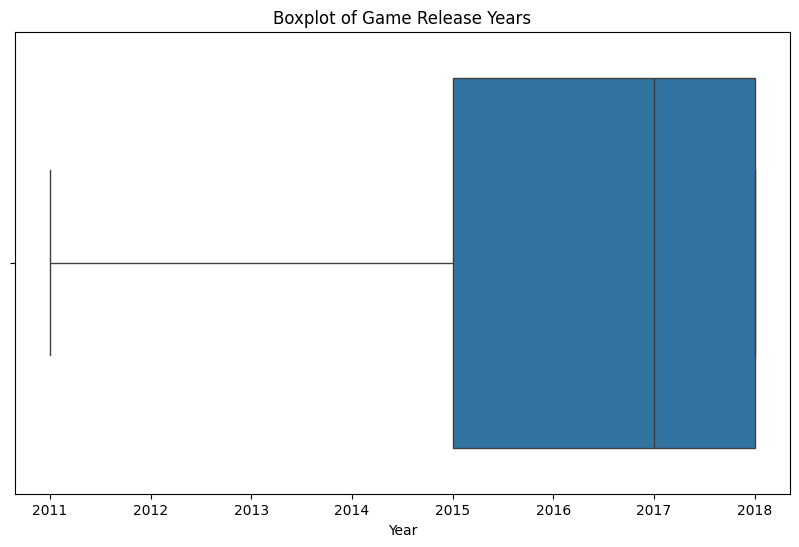

In [49]:
# filling missing values with the median year
data['year'].fillna(data['year'].median(), inplace=True)

# Creating a boxplot for the 'year' column
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.boxplot(x=data['year'])
plt.title('Boxplot of Game Release Years')  # Title for the boxplot
plt.xlabel('Year')  # Label for the x-axis
plt.show()  # Display the plot


In [50]:
data.isnull().sum()

review_id      0
title          0
developer      0
publisher      0
tags           0
overview       0
year           0
user_review    0
sentiment      0
dtype: int64

C:\Users\sreev\AppData\Local\Temp\ipykernel_9896\870181565.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values, palette='viridis')


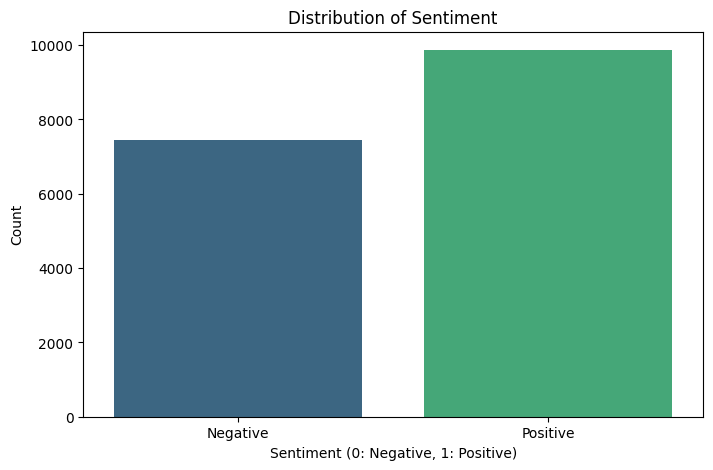

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sentiment' is binary and not yet encoded
data['sentiment'] = data['sentiment'].map({'Positive': 1, 'Negative': 0})

# Check distribution
sentiment_dist = data['sentiment'].value_counts()

# Plot distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values, palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


- Overall Sentiment: The dataset overall is skewed towards positive sentiment, but there remains a significant proportion of negative reviews.- Publisher-Specific Sentiment: The distribution of sentiments varies across different publishers, with:Freejam facing significant criticism.Bethesda Softworks receiving mixed feedback, leaning slightly towards negative.Valve and Hi-Rez Studios showing balanced but generally favorable feedback.- Potential Focus Areas:    - Publishers with Negative Sentiments: For publishers like Freejam and Bethesda Softworks, further analysis of specific reviews could help identify areas of improvement.    - Publishers with Positive Sentiments: Publishers like Valve and Dire Wolf Digital might focus on maintaining their strengths while addressing any existing issues.

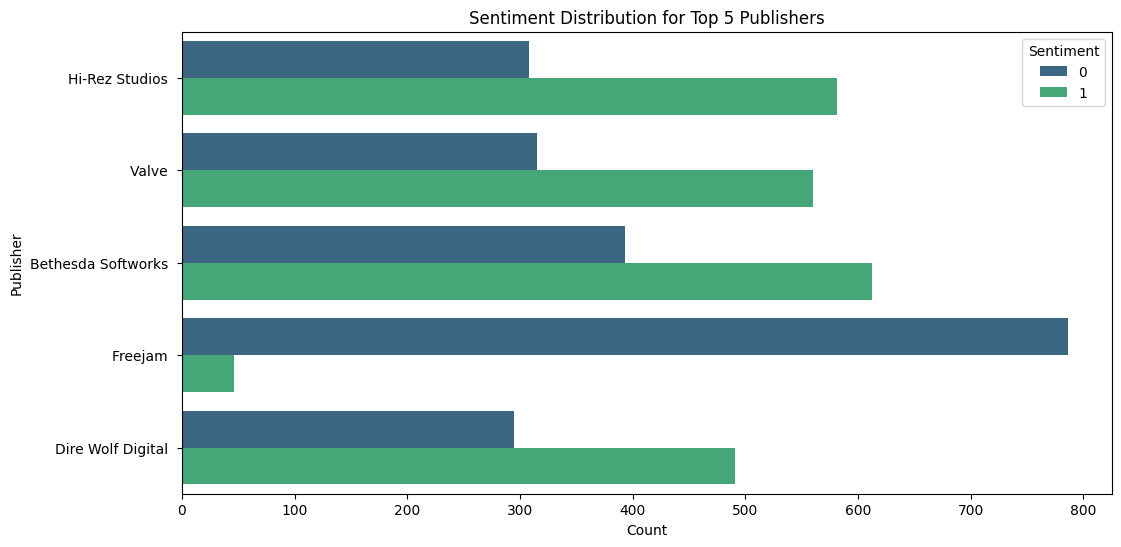

In [55]:
top_publishers = data['publisher'].value_counts().head(5).index
filtered_data = data[data['publisher'].isin(top_publishers)]

plt.figure(figsize=(12, 6))
sns.countplot(y='publisher', hue='sentiment', data=filtered_data, palette='viridis')
plt.title('Sentiment Distribution for Top 5 Publishers')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.legend(title='Sentiment')
plt.show()

- Negative Sentiment Dominance: For most publishers, negative reviews outnumber positive ones, highlighting potential issues or dissatisfaction from users.- Balanced or Positive Sentiment for Valve: Valve's reviews are somewhat balanced with a slight lean towards positive feedback, indicating a mixed but overall favorable reception from users.- Publisher-Specific Issues: Publishers like Freejam show a stark imbalance towards negative reviews, suggesting specific issues affecting users' experiences.s.

## **Question 2 : Data Pre-processing & Feature Engineering** (20 pt)
- Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.
- Perform Feature Engineering on the dataset. Since this is a text-heavy dataset, you have to tokenize and pre-process the text data.

**Hints**:
- Check for any null values or duplicate rows in the dataset and perform necessary actions. Also, encoding categorical columns properly.
- Primary goal is to analyze reviews to predict sentiment. Such data requires a lot of pre-processing.
- You can start with using **regular expressions** to remove **links**, **HTML tags**, **unnecessary punctuation**, **emojis** (if any), etc.
- You can remove **stopwords** with very high or very low frequency across the reviews.
- You can also perform some advance techniques like **stemming** or **lemmatization** to further remove reduncancies.
- For feature engineering, you can use other techniques such as "**counter vectorization**" and "**tf-idf vectorization**" before modeling.

Handling Null Values: Missing values can lead to errors during modeling or bias in the model’s predictions.

In [7]:
duplicates = data.duplicated()
print("Number of duplicate entries:", duplicates.sum())


Number of duplicate entries: 0


Text Preprocessing:-  Raw text data often contains noise and irrelevant information which can distract the model from making accurate predictions.

In [8]:
def preprocess_dataframe(dataframe, text_column):
    # Initialize stopwords, stemmer, and lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    def preprocess_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatization
        tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
        # Optional: Stemming
        # tokens = [stemmer.stem(word) for word in tokens]
        # Handle emojis and special characters
        tokens = [re.sub(r'[^\x00-\x7F]+', '', word) for word in tokens]
        # Rejoin words into one string
        return ' '.join(tokens)

    # Apply preprocessing to the specified text column
    dataframe[text_column] = dataframe[text_column].apply(preprocess_text)
    
    return dataframe


# Apply the preprocessing function to the 'user_review' column
preprocessed_data = preprocess_dataframe(data, 'user_review')
print(preprocessed_data)

C:\Users\sreev\AppData\Local\Temp\ipykernel_9896\3338564107.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


       review_id                                              title  \
0           4848                                             SMITE®   
1          15427  Business Tour - Board Game with Online Multipl...   
2           8236                                        Neverwinter   
3           3805                                    Team Fortress 2   
4          17261                                  School of Dragons   
...          ...                                                ...   
17314      12056                                       Bless Online   
17315      15441  Business Tour - Board Game with Online Multipl...   
17316       3699                                    Team Fortress 2   
17317       5275                                         Brawlhalla   
17318      11731                                       Bless Online   

                    developer                     publisher  \
0          Titan Forge Games                Hi-Rez Studios    
1                    

1. Convert to Lowercase: Textual data can be case-sensitive, and variations like "This" vs. "this" might be interpreted as different words. Converting to lowercase standardizes the text, making subsequent processing more consistent.2. Remove HTML Tags: User-generated content like reviews may include HTML tags, which can introduce noise. Stripping these tags using BeautifulSoup cleans up the text and focuses only on the content.3. Remove URLs: Reviews often contain URLs that point to external resources or references. These URLs can clutter text analysis, so they are removed using a regular expression to focus on the review content.4. Remove Punctuation: Punctuation marks (.,!?") and other symbols can disrupt tokenization and add noise to text data. Removing them using str.maketrans streamlines the text for subsequent processing.5. Tokenization: Breaking text into individual words (tokens) is essential for NLP tasks, making it easier to analyze word frequency, relationships, and semantic meaning. word_tokenize helps to split the text into manageable tokens.6. Remove Stopwords: Stopwords are common words like "the", "and", or "but" that don't contribute much semantic meaning to a review. Filtering them out focuses on the key terms that are more relevant to understanding sentiment or content.7. Lemmatization: Lemmatization reduces words to their base or root form. For example, "running" becomes "run". This standardizes different word forms and helps in reducing variability, making analysis more consistent.e consistent.

In [9]:
preprocessed_data = preprocess_dataframe(preprocessed_data, 'overview')
preprocessed_data

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE®,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",enter battleground godsjoin millions smite pla...,2016.0,ive play game since beta end im pretty addicte...,Positive
1,15427,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2018.0,fun little game really need put vote kick opti...,Positive
2,8236,Neverwinter,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,first pay win game zen currency buy real money...,Positive
3,3805,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2014.0,game funny tactical want play like 6 months ev...,Positive
4,17261,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",changewing dragon availablefly fast train hard...,2017.0,great game really understand membership thing ...,Positive
...,...,...,...,...,...,...,...,...,...
17314,12056,Bless Online,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",invite world bless online explore beautiful ...,2018.0,play roughly 2 hours best part game character ...,Negative
17315,15441,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2017.0,notemake sure friends thats allmy best summary...,Positive
17316,3699,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2016.0,special funny lucky friendly excite heartpumpi...,Positive
17317,5275,Brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2018.0,product receive freethis free friendly multipl...,Positive


In [10]:
preprocessed_data = preprocess_dataframe(preprocessed_data, 'title')
preprocessed_data

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,smite,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",enter battleground godsjoin millions smite pla...,2016.0,ive play game since beta end im pretty addicte...,Positive
1,15427,business tour board game online multiplayer,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2018.0,fun little game really need put vote kick opti...,Positive
2,8236,neverwinter,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,first pay win game zen currency buy real money...,Positive
3,3805,team fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2014.0,game funny tactical want play like 6 months ev...,Positive
4,17261,school dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",changewing dragon availablefly fast train hard...,2017.0,great game really understand membership thing ...,Positive
...,...,...,...,...,...,...,...,...,...
17314,12056,bless online,NEOWIZ BLESS STUDIO,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",invite world bless online explore beautiful ...,2018.0,play roughly 2 hours best part game character ...,Negative
17315,15441,business tour board game online multiplayer,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2017.0,notemake sure friends thats allmy best summary...,Positive
17316,3699,team fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2016.0,special funny lucky friendly excite heartpumpi...,Positive
17317,5275,brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2018.0,product receive freethis free friendly multipl...,Positive


In [11]:
preprocessed_data = preprocess_dataframe(preprocessed_data, 'developer')
preprocessed_data

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,smite,titan forge game,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",enter battleground godsjoin millions smite pla...,2016.0,ive play game since beta end im pretty addicte...,Positive
1,15427,business tour board game online multiplayer,creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2018.0,fun little game really need put vote kick opti...,Positive
2,8236,neverwinter,cryptic studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,first pay win game zen currency buy real money...,Positive
3,3805,team fortress 2,valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2014.0,game funny tactical want play like 6 months ev...,Positive
4,17261,school dragons,jumpstart game inc,"JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",changewing dragon availablefly fast train hard...,2017.0,great game really understand membership thing ...,Positive
...,...,...,...,...,...,...,...,...,...
17314,12056,bless online,neowiz bless studio,NEOWIZ,"['MMORPG', 'Open World', 'Massively Multiplaye...",invite world bless online explore beautiful ...,2018.0,play roughly 2 hours best part game character ...,Negative
17315,15441,business tour board game online multiplayer,creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2017.0,notemake sure friends thats allmy best summary...,Positive
17316,3699,team fortress 2,valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2016.0,special funny lucky friendly excite heartpumpi...,Positive
17317,5275,brawlhalla,blue mammoth game,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2018.0,product receive freethis free friendly multipl...,Positive


In [12]:
preprocessed_data = preprocess_dataframe(preprocessed_data, 'publisher')
preprocessed_data

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,smite,titan forge game,hirez studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",enter battleground godsjoin millions smite pla...,2016.0,ive play game since beta end im pretty addicte...,Positive
1,15427,business tour board game online multiplayer,creobit,8floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2018.0,fun little game really need put vote kick opti...,Positive
2,8236,neverwinter,cryptic studios,perfect world entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,first pay win game zen currency buy real money...,Positive
3,3805,team fortress 2,valve,valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2014.0,game funny tactical want play like 6 months ev...,Positive
4,17261,school dragons,jumpstart game inc,jumpstart game inc,"['Free to Play', 'Dragons', 'Adventure', 'Mult...",changewing dragon availablefly fast train hard...,2017.0,great game really understand membership thing ...,Positive
...,...,...,...,...,...,...,...,...,...
17314,12056,bless online,neowiz bless studio,neowiz,"['MMORPG', 'Open World', 'Massively Multiplaye...",invite world bless online explore beautiful ...,2018.0,play roughly 2 hours best part game character ...,Negative
17315,15441,business tour board game online multiplayer,creobit,8floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...",business tour simple entertain gameplay allow ...,2017.0,notemake sure friends thats allmy best summary...,Positive
17316,3699,team fortress 2,valve,valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2016.0,special funny lucky friendly excite heartpumpi...,Positive
17317,5275,brawlhalla,blue mammoth game,ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2018.0,product receive freethis free friendly multipl...,Positive


In [13]:
def preprocess_tags(dataframe, tags_column):
    # Step 1: Clean and standardize tags
    # Convert to lowercase and remove special characters
    dataframe[tags_column] = dataframe[tags_column].str.lower().str.replace('[^\w\s,]', '')
    
    # Convert string of tags into a list of tags
    dataframe[tags_column] = dataframe[tags_column].apply(lambda x: x.split(','))

    # Step 2: Optional, transform tags for modeling
    # Instantiate the MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    
    # Fit and transform the tags into a binary matrix
    tags_encoded = mlb.fit_transform(dataframe[tags_column])
    
    # Create a DataFrame from the encoded tags
    tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)
    
    # Concatenate the original DataFrame with the new tags DataFrame
    dataframe = pd.concat([dataframe, tags_df], axis=1)
    
    return dataframe


tags_data = preprocess_tags(preprocessed_data, 'tags')
tags_data


,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment,"""beat 'em up""",...,['early access',['free to play',['horror',['mmorpg',['nudity',['racing',['simulation',['space',['tanks',['zombies'
0,4848,smite,titan forge game,hirez studios,"[['free to play', 'moba', 'multiplayer', 'a...",enter battleground godsjoin millions smite pla...,2016.0,ive play game since beta end im pretty addicte...,Positive,0,...,0,1,0,0,0,0,0,0,0,0
1,15427,business tour board game online multiplayer,creobit,8floor,"[['free to play', 'board game', 'strategy', ...",business tour simple entertain gameplay allow ...,2018.0,fun little game really need put vote kick opti...,Positive,0,...,0,1,0,0,0,0,0,0,0,0
2,8236,neverwinter,cryptic studios,perfect world entertainment,"[['free to play', 'mmorpg', 'rpg', 'massive...",,2014.0,first pay win game zen currency buy real money...,Positive,0,...,0,1,0,0,0,0,0,0,0,0
3,3805,team fortress 2,valve,valve,"[['free to play', 'multiplayer', 'fps', 'ac...",fun online pc gameris free catch play much wa...,2014.0,game funny tactical want play like 6 months ev...,Positive,0,...,0,1,0,0,0,0,0,0,0,0
4,17261,school dragons,jumpstart game inc,jumpstart game inc,"[['free to play', 'dragons', 'adventure', '...",changewing dragon availablefly fast train hard...,2017.0,great game really understand membership thing ...,Positive,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17314,12056,bless online,neowiz bless studio,neowiz,"[['mmorpg', 'open world', 'massively multipl...",invite world bless online explore beautiful ...,2018.0,play roughly 2 hours best part game character ...,Negative,0,...,0,0,0,1,0,0,0,0,0,0
17315,15441,business tour board game online multiplayer,creobit,8floor,"[['free to play', 'board game', 'strategy', ...",business tour simple entertain gameplay allow ...,2017.0,notemake sure friends thats allmy best summary...,Positive,0,...,0,1,0,0,0,0,0,0,0,0
17316,3699,team fortress 2,valve,valve,"[['free to play', 'multiplayer', 'fps', 'ac...",fun online pc gameris free catch play much wa...,2016.0,special funny lucky friendly excite heartpumpi...,Positive,0,...,0,1,0,0,0,0,0,0,0,0
17317,5275,brawlhalla,blue mammoth game,ubisoft,"[['free to play', 'multiplayer', 'fighting',...",brawlhalla eternal battle arena greatest warri...,2018.0,product receive freethis free friendly multipl...,Positive,1,...,0,1,0,0,0,0,0,0,0,0


In [14]:
tags_data['sentiment'] = tags_data['sentiment'].map({'Positive': 1, 'Negative': 0})
tags_data

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment,"""beat 'em up""",...,['early access',['free to play',['horror',['mmorpg',['nudity',['racing',['simulation',['space',['tanks',['zombies'
0,4848,smite,titan forge game,hirez studios,"[['free to play', 'moba', 'multiplayer', 'a...",enter battleground godsjoin millions smite pla...,2016.0,ive play game since beta end im pretty addicte...,1,0,...,0,1,0,0,0,0,0,0,0,0
1,15427,business tour board game online multiplayer,creobit,8floor,"[['free to play', 'board game', 'strategy', ...",business tour simple entertain gameplay allow ...,2018.0,fun little game really need put vote kick opti...,1,0,...,0,1,0,0,0,0,0,0,0,0
2,8236,neverwinter,cryptic studios,perfect world entertainment,"[['free to play', 'mmorpg', 'rpg', 'massive...",,2014.0,first pay win game zen currency buy real money...,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3805,team fortress 2,valve,valve,"[['free to play', 'multiplayer', 'fps', 'ac...",fun online pc gameris free catch play much wa...,2014.0,game funny tactical want play like 6 months ev...,1,0,...,0,1,0,0,0,0,0,0,0,0
4,17261,school dragons,jumpstart game inc,jumpstart game inc,"[['free to play', 'dragons', 'adventure', '...",changewing dragon availablefly fast train hard...,2017.0,great game really understand membership thing ...,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17314,12056,bless online,neowiz bless studio,neowiz,"[['mmorpg', 'open world', 'massively multipl...",invite world bless online explore beautiful ...,2018.0,play roughly 2 hours best part game character ...,0,0,...,0,0,0,1,0,0,0,0,0,0
17315,15441,business tour board game online multiplayer,creobit,8floor,"[['free to play', 'board game', 'strategy', ...",business tour simple entertain gameplay allow ...,2017.0,notemake sure friends thats allmy best summary...,1,0,...,0,1,0,0,0,0,0,0,0,0
17316,3699,team fortress 2,valve,valve,"[['free to play', 'multiplayer', 'fps', 'ac...",fun online pc gameris free catch play much wa...,2016.0,special funny lucky friendly excite heartpumpi...,1,0,...,0,1,0,0,0,0,0,0,0,0
17317,5275,brawlhalla,blue mammoth game,ubisoft,"[['free to play', 'multiplayer', 'fighting',...",brawlhalla eternal battle arena greatest warri...,2018.0,product receive freethis free friendly multipl...,1,1,...,0,1,0,0,0,0,0,0,0,0


In [15]:
tags_data=tags_data.drop(columns=[" 'capitalism'", " 'turn-based strategy'", " 'classic'", " 'early access']", " 'tactical rpg'", " 'loot']", " 'turn-based'", " 'turn-based tactics'"])

In [16]:
tags_data

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment,"""beat 'em up""",...,['early access',['free to play',['horror',['mmorpg',['nudity',['racing',['simulation',['space',['tanks',['zombies'
0,4848,smite,titan forge game,hirez studios,"[['free to play', 'moba', 'multiplayer', 'a...",enter battleground godsjoin millions smite pla...,2016.0,ive play game since beta end im pretty addicte...,1,0,...,0,1,0,0,0,0,0,0,0,0
1,15427,business tour board game online multiplayer,creobit,8floor,"[['free to play', 'board game', 'strategy', ...",business tour simple entertain gameplay allow ...,2018.0,fun little game really need put vote kick opti...,1,0,...,0,1,0,0,0,0,0,0,0,0
2,8236,neverwinter,cryptic studios,perfect world entertainment,"[['free to play', 'mmorpg', 'rpg', 'massive...",,2014.0,first pay win game zen currency buy real money...,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3805,team fortress 2,valve,valve,"[['free to play', 'multiplayer', 'fps', 'ac...",fun online pc gameris free catch play much wa...,2014.0,game funny tactical want play like 6 months ev...,1,0,...,0,1,0,0,0,0,0,0,0,0
4,17261,school dragons,jumpstart game inc,jumpstart game inc,"[['free to play', 'dragons', 'adventure', '...",changewing dragon availablefly fast train hard...,2017.0,great game really understand membership thing ...,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17314,12056,bless online,neowiz bless studio,neowiz,"[['mmorpg', 'open world', 'massively multipl...",invite world bless online explore beautiful ...,2018.0,play roughly 2 hours best part game character ...,0,0,...,0,0,0,1,0,0,0,0,0,0
17315,15441,business tour board game online multiplayer,creobit,8floor,"[['free to play', 'board game', 'strategy', ...",business tour simple entertain gameplay allow ...,2017.0,notemake sure friends thats allmy best summary...,1,0,...,0,1,0,0,0,0,0,0,0,0
17316,3699,team fortress 2,valve,valve,"[['free to play', 'multiplayer', 'fps', 'ac...",fun online pc gameris free catch play much wa...,2016.0,special funny lucky friendly excite heartpumpi...,1,0,...,0,1,0,0,0,0,0,0,0,0
17317,5275,brawlhalla,blue mammoth game,ubisoft,"[['free to play', 'multiplayer', 'fighting',...",brawlhalla eternal battle arena greatest warri...,2018.0,product receive freethis free friendly multipl...,1,1,...,0,1,0,0,0,0,0,0,0,0


## **Question 3 : Modeling** (20 pt)

- You are supposed to train a **Logistic Regression Classifier** along with atleast two other classifiers of your choice and optimize their hyperparameters (Hint: Using GridsearchCV) to enhance performance.
- Implement a validation pipeline utilizing 5-fold cross-validation.
- For each classifier, report **F1 score**, **Precision**, **Recall**, **Accuracy**, **ROC-AUC**, and **Cross-validation** score).
- Also, for each model, **plot the ROC-AUC curve**.
- Describe and discuss your findings.

**Hint**:
- To calculate the ROC-AUC scores, you need to predict the probabilites of the classes instead of the classes themselves. You can refer to the sklearn documentation for [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for more information.

In [22]:
# Define features and target
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = tags_data.drop('sentiment', axis=1)
y = tags_data['sentiment']
# Identify categorical and numerical columns (exclude text and pre-encoded columns)
#categorical_features = ['title', 'developer', 'publisher']  # Add other categorical column names
text_features = 'user_review'  # assuming user_review is the column with text data
pre_encoded_features = [col for col in tags_data.columns if col not in ['review_id', 'title', 'developer', 'publisher', 'tags', 'overview', 'year', 'user_review', 'sentiment']]

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year']),  # Scale numerical data
        ('txt', TfidfVectorizer(), text_features),  # Vectorize text data
        ('encoded', 'passthrough', pre_encoded_features)  # Pass through already encoded features
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'logreg__C': 10, 'logreg__penalty': 'l2'}
Best cross-validation score: 0.86
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1466
           1       0.88      0.89      0.89      1998

    accuracy                           0.87      3464
   macro avg       0.87      0.87      0.87      3464
weighted avg       0.87      0.87      0.87      3464

ROC-AUC Score: 0.9390912058033477


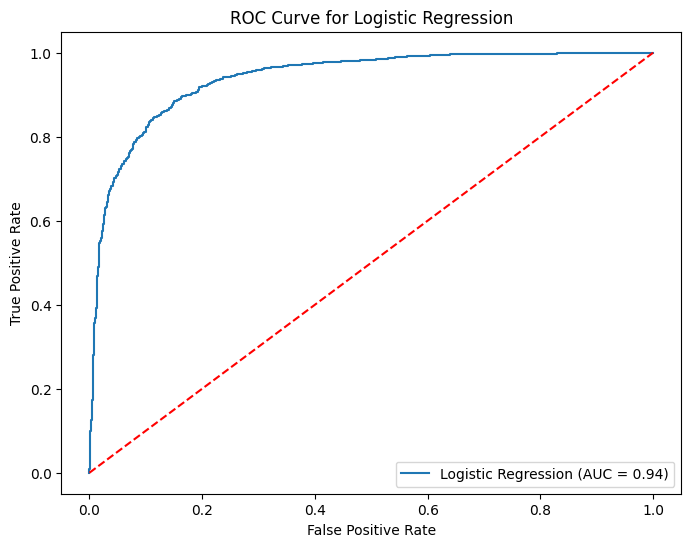

In [43]:
# Create a logistic regression pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(solver='liblinear'))  # Using 'liblinear' for binary classification
])

# Define the parameter grid for GridSearchCV
param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2']        # L1 and L2 regularization
}

# Setup GridSearchCV
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', verbose=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_lr.fit(X_train, y_train)

# Best model, predict and evaluate
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]  # Probability scores for ROC curve

print("Best parameters:", grid_lr.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_lr.best_score_))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

# Plot ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_lr))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best cross-validation score: 0.81
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1466
           1       0.81      0.91      0.86      1998

    accuracy                           0.83      3464
   macro avg       0.83      0.81      0.82      3464
weighted avg       0.83      0.83      0.83      3464

ROC-AUC Score: 0.9076124214255181


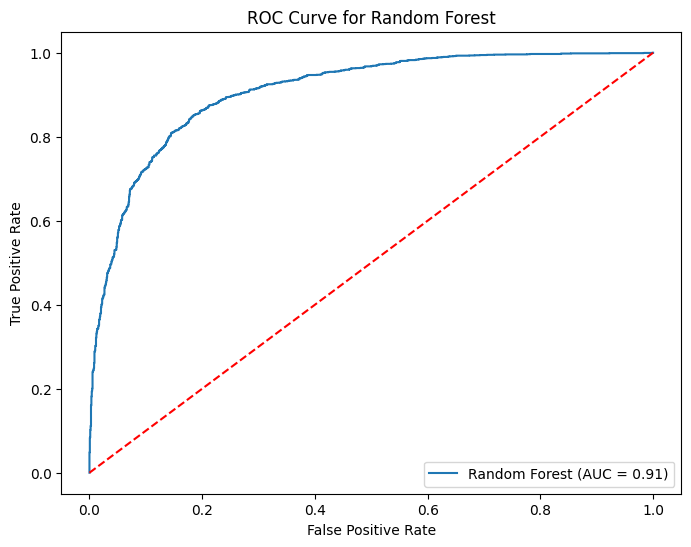

In [56]:
# Set up the hyperparameter grid
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])
# Instantiate GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_rf.fit(X_train, y_train)

# Retrieve the best estimator
best_rf = grid_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]  # probabilities needed for the ROC curve

# Evaluation
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_rf.best_score_))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Plot ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'distance'}
Best cross-validation score: 0.78
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1466
           1       0.79      0.88      0.83      1998

    accuracy                           0.80      3464
   macro avg       0.80      0.78      0.79      3464
weighted avg       0.80      0.80      0.79      3464

ROC-AUC Score: 0.8714248013361247


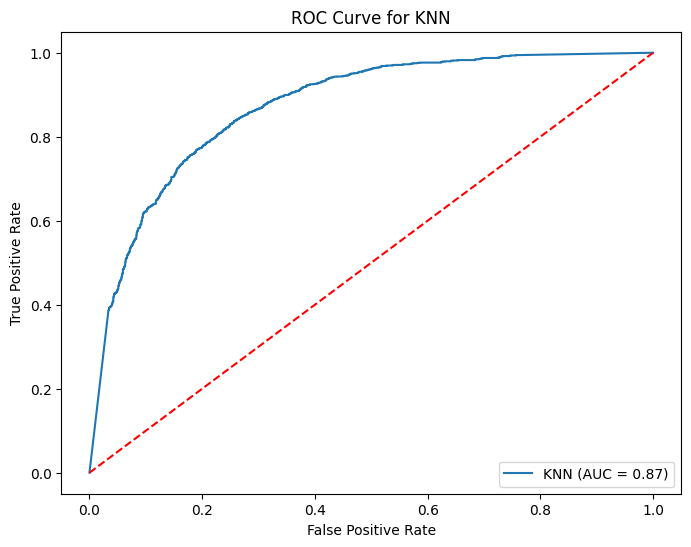

In [29]:
# Create a pipeline with KNN
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())  # KNN classifier as the final step
])

# Define the parameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Different values for 'k'
    'knn__weights': ['uniform', 'distance'],  # How to weight neighbors
    'knn__p': [1, 2]  # For distance metrics: 1 for Manhattan, 2 for Euclidean
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up GridSearchCV for hyperparameter tuning
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_knn.fit(X_train, y_train)

# Get the best model, predictions, and evaluation
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]  # Needed for ROC curve

print("Best parameters found:", grid_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))

# Plot the ROC curve
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_knn)))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

## **Question 4 : Evaluation and Reporting** (20 pt)

- Select a model that is expected to perform optimally on the unseen data and provide the predicted sentiments accordingly.
- Give clear conclusions.

In [44]:
predicted_sentiments = best_lr.predict(X_test)

# Print the predicted sentiments
print("Predicted Sentiments:")
print(predicted_sentiments)

Predicted Sentiments:
[1 1 0 ... 0 1 1]


## **Question 5 : External validation** (30 pt)

- A dataset named '`test.csv`' is provided to you in which the sentiment label is hidden.
- You have to choose the best model (the classifier which has the highest ROC-AUC score) and then use that model to predict the probabilities of sentiment on the '`test.csv`'.
- After prediction, you will get a 2D array of probabilities for each sentiment. Select the 2nd column of probabilites for your submission.

```
# Fit
your_best_model = model.fit(x_train)

# Calculate the probabilities of both classes and extract the probabilities of positive class
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]

# Evaluate/Submit
---
```

- Convert that final array into a csv file, name it as '`submission.csv`' and submit that '`submission.csv`' file.

In [2]:
# This is pseudo-code. Each student have to use their actual code for this.

# step 1. Load the  data
test = pd.read_csv('./data/test.csv')

# step 2. Pre-process the test data. You can use the same pre processing methods which you used for the train dataset earlier
x_test = preprocess_data(test)

# step 3. Choose the best model
your_best_model = some_model

# step 4. Make predictions of probabilites using sklearn's model.predict_proba() method
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]

# step 5. Save output as csv file
pred_probabilities = pd.DataFrame(pred_probabilities, columns=['PositiveSentimentProbability'])
pred_probabilities.to_csv('./submission.csv', index = False)

In [21]:
test_df=pd.read_csv("C:/Users/sreev/OneDrive/Documents/AI/final/Problem1/data/test.csv")
test_df

,review_id,title,developer,publisher,tags,overview,year,user_review
0,9691,Realm of the Mad God,"Wild Shadow Studios, Deca Games",Deca Games,"['Free to Play', 'Massively Multiplayer', 'Pix...",Realm of the Mad God is the first ever free to...,2017.0,ROTMG is a free bullet hell-style mmorp...
1,4014,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2011.0,"Team Fortress 2, seems like such an understate..."
2,1910,Dota 2,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...","The most-played game on Steam.Every day, milli...",2014.0,"Very good tool to learn new words, such as♥♥♥♥..."
3,7378,The Elder Scrolls®: Legends™,"Sparkypants Studios, LLC",Bethesda Softworks,"['Free to Play', 'Card Game', 'Multiplayer', '...",PLAY ON YOUR OWNStory mode provides hours of s...,2017.0,While the presentation of this game is phenome...
4,7488,Trove,Trion Worlds,Trion Worlds,"['Free to Play', 'Open World', 'Multiplayer', ...","Grab your friends, hone your blades, and set o...",2017.0,"Glad to have wasted 1k hours on this game, end..."
...,...,...,...,...,...,...,...,...
170,2155,Path of Exile,Grinding Gear Games,Grinding Gear Games,"['Free to Play', 'Action RPG', 'Hack and Slash...","You are an Exile, struggling to survive on the...",2017.0,Quite a spectacular game all around! I come fr...
171,492,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...,2015.0,A really great game! I would love to donate to...
172,16474,World of Guns: Gun Disassembly,Noble Empire Corp.,Noble Empire Corp.,"['Free to Play', 'Simulation', 'Shooter', 'Gun...",Do you know how the insides of a Terminator’s ...,2017.0,"World of guns, what can I say.I'm not a huge f..."
173,5106,Brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",Brawlhalla: An eternal battle arena where the ...,2015.0,Early Access ReviewHands down one of the best ...


In [22]:
test_df.isnull().sum()

review_id      0
title          0
developer      0
publisher      0
tags           0
overview       0
year           0
user_review    0
dtype: int64

In [23]:
def preprocess_dataframe(dataframe, text_column):
    # Initialize stopwords, stemmer, and lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    def preprocess_text(text):
        # Convert to lowercase
        text = text.lower()
        # Remove HTML tags
        text = BeautifulSoup(text, "html.parser").get_text()
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatization
        tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
        # Optional: Stemming
        # tokens = [stemmer.stem(word) for word in tokens]
        # Handle emojis and special characters
        tokens = [re.sub(r'[^\x00-\x7F]+', '', word) for word in tokens]
        # Rejoin words into one string
        return ' '.join(tokens)

    # Apply preprocessing to the specified text column
    dataframe[text_column] = dataframe[text_column].apply(preprocess_text)
    
    return dataframe


# Apply the preprocessing function to the 'user_review' column
test_data = preprocess_dataframe(test_df, 'user_review')
test_data

C:\Users\sreev\AppData\Local\Temp\ipykernel_27388\1649752261.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,review_id,title,developer,publisher,tags,overview,year,user_review
0,9691,Realm of the Mad God,"Wild Shadow Studios, Deca Games",Deca Games,"['Free to Play', 'Massively Multiplayer', 'Pix...",Realm of the Mad God is the first ever free to...,2017.0,rotmg free bullet hellstyle mmorpg unlike many...
1,4014,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2011.0,team fortress 2 seem like understatement say r...
2,1910,Dota 2,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...","The most-played game on Steam.Every day, milli...",2014.0,good tool learn new word as and easy way learn...
3,7378,The Elder Scrolls®: Legends™,"Sparkypants Studios, LLC",Bethesda Softworks,"['Free to Play', 'Card Game', 'Multiplayer', '...",PLAY ON YOUR OWNStory mode provides hours of s...,2017.0,presentation game phenomenal variety card alre...
4,7488,Trove,Trion Worlds,Trion Worlds,"['Free to Play', 'Open World', 'Multiplayer', ...","Grab your friends, hone your blades, and set o...",2017.0,glad waste 1k hours game endlessly grind reaso...
...,...,...,...,...,...,...,...,...
170,2155,Path of Exile,Grinding Gear Games,Grinding Gear Games,"['Free to Play', 'Action RPG', 'Hack and Slash...","You are an Exile, struggling to survive on the...",2017.0,quite spectacular game around come d2d3 era fi...
171,492,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...,2015.0,really great game would love donate wonderful ...
172,16474,World of Guns: Gun Disassembly,Noble Empire Corp.,Noble Empire Corp.,"['Free to Play', 'Simulation', 'Shooter', 'Gun...",Do you know how the insides of a Terminator’s ...,2017.0,world gun sayim huge fan gun bigger fan game h...
173,5106,Brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",Brawlhalla: An eternal battle arena where the ...,2015.0,early access reviewhands one best free game ge...


In [24]:
test_df = preprocess_dataframe(test_df, 'overview')
test_df

,review_id,title,developer,publisher,tags,overview,year,user_review
0,9691,Realm of the Mad God,"Wild Shadow Studios, Deca Games",Deca Games,"['Free to Play', 'Massively Multiplayer', 'Pix...",realm mad god first ever free play bullet hell...,2017.0,rotmg free bullet hellstyle mmorpg unlike many...
1,4014,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2011.0,team fortress 2 seem like understatement say r...
2,1910,Dota 2,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...",mostplayed game steamevery day millions player...,2014.0,good tool learn new word as and easy way learn...
3,7378,The Elder Scrolls®: Legends™,"Sparkypants Studios, LLC",Bethesda Softworks,"['Free to Play', 'Card Game', 'Multiplayer', '...",play ownstory mode provide hours solo gameplay...,2017.0,presentation game phenomenal variety card alre...
4,7488,Trove,Trion Worlds,Trion Worlds,"['Free to Play', 'Open World', 'Multiplayer', ...",grab friends hone blades set adventure trove u...,2017.0,glad waste 1k hours game endlessly grind reaso...
...,...,...,...,...,...,...,...,...
170,2155,Path of Exile,Grinding Gear Games,Grinding Gear Games,"['Free to Play', 'Action RPG', 'Hack and Slash...",exile struggle survive dark continent wraeclas...,2017.0,quite spectacular game around come d2d3 era fi...
171,492,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",latest entry sakura series actionpacked ever s...,2015.0,really great game would love donate wonderful ...
172,16474,World of Guns: Gun Disassembly,Noble Empire Corp.,Noble Empire Corp.,"['Free to Play', 'Simulation', 'Shooter', 'Gun...",know insides terminator minigun work try worl...,2017.0,world gun sayim huge fan gun bigger fan game h...
173,5106,Brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2015.0,early access reviewhands one best free game ge...


In [25]:
test_df = preprocess_dataframe(test_df, 'title')
test_df

,review_id,title,developer,publisher,tags,overview,year,user_review
0,9691,realm mad god,"Wild Shadow Studios, Deca Games",Deca Games,"['Free to Play', 'Massively Multiplayer', 'Pix...",realm mad god first ever free play bullet hell...,2017.0,rotmg free bullet hellstyle mmorpg unlike many...
1,4014,team fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2011.0,team fortress 2 seem like understatement say r...
2,1910,dota 2,Valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...",mostplayed game steamevery day millions player...,2014.0,good tool learn new word as and easy way learn...
3,7378,elder scrolls legends,"Sparkypants Studios, LLC",Bethesda Softworks,"['Free to Play', 'Card Game', 'Multiplayer', '...",play ownstory mode provide hours solo gameplay...,2017.0,presentation game phenomenal variety card alre...
4,7488,trove,Trion Worlds,Trion Worlds,"['Free to Play', 'Open World', 'Multiplayer', ...",grab friends hone blades set adventure trove u...,2017.0,glad waste 1k hours game endlessly grind reaso...
...,...,...,...,...,...,...,...,...
170,2155,path exile,Grinding Gear Games,Grinding Gear Games,"['Free to Play', 'Action RPG', 'Hack and Slash...",exile struggle survive dark continent wraeclas...,2017.0,quite spectacular game around come d2d3 era fi...
171,492,sakura clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",latest entry sakura series actionpacked ever s...,2015.0,really great game would love donate wonderful ...
172,16474,world gun gun disassembly,Noble Empire Corp.,Noble Empire Corp.,"['Free to Play', 'Simulation', 'Shooter', 'Gun...",know insides terminator minigun work try worl...,2017.0,world gun sayim huge fan gun bigger fan game h...
173,5106,brawlhalla,Blue Mammoth Games,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2015.0,early access reviewhands one best free game ge...


In [26]:
test_df = preprocess_dataframe(test_df, 'developer')
test_df

,review_id,title,developer,publisher,tags,overview,year,user_review
0,9691,realm mad god,wild shadow studios deca game,Deca Games,"['Free to Play', 'Massively Multiplayer', 'Pix...",realm mad god first ever free play bullet hell...,2017.0,rotmg free bullet hellstyle mmorpg unlike many...
1,4014,team fortress 2,valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2011.0,team fortress 2 seem like understatement say r...
2,1910,dota 2,valve,Valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...",mostplayed game steamevery day millions player...,2014.0,good tool learn new word as and easy way learn...
3,7378,elder scrolls legends,sparkypants studios llc,Bethesda Softworks,"['Free to Play', 'Card Game', 'Multiplayer', '...",play ownstory mode provide hours solo gameplay...,2017.0,presentation game phenomenal variety card alre...
4,7488,trove,trion worlds,Trion Worlds,"['Free to Play', 'Open World', 'Multiplayer', ...",grab friends hone blades set adventure trove u...,2017.0,glad waste 1k hours game endlessly grind reaso...
...,...,...,...,...,...,...,...,...
170,2155,path exile,grind gear game,Grinding Gear Games,"['Free to Play', 'Action RPG', 'Hack and Slash...",exile struggle survive dark continent wraeclas...,2017.0,quite spectacular game around come d2d3 era fi...
171,492,sakura clicker,wing cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",latest entry sakura series actionpacked ever s...,2015.0,really great game would love donate wonderful ...
172,16474,world gun gun disassembly,noble empire corp,Noble Empire Corp.,"['Free to Play', 'Simulation', 'Shooter', 'Gun...",know insides terminator minigun work try worl...,2017.0,world gun sayim huge fan gun bigger fan game h...
173,5106,brawlhalla,blue mammoth game,Ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2015.0,early access reviewhands one best free game ge...


In [27]:
test_df = preprocess_dataframe(test_df, 'publisher')
test_df

,review_id,title,developer,publisher,tags,overview,year,user_review
0,9691,realm mad god,wild shadow studios deca game,deca game,"['Free to Play', 'Massively Multiplayer', 'Pix...",realm mad god first ever free play bullet hell...,2017.0,rotmg free bullet hellstyle mmorpg unlike many...
1,4014,team fortress 2,valve,valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...",fun online pc gameris free catch play much wa...,2011.0,team fortress 2 seem like understatement say r...
2,1910,dota 2,valve,valve,"['Free to Play', 'MOBA', 'Strategy', 'Multipla...",mostplayed game steamevery day millions player...,2014.0,good tool learn new word as and easy way learn...
3,7378,elder scrolls legends,sparkypants studios llc,bethesda softworks,"['Free to Play', 'Card Game', 'Multiplayer', '...",play ownstory mode provide hours solo gameplay...,2017.0,presentation game phenomenal variety card alre...
4,7488,trove,trion worlds,trion worlds,"['Free to Play', 'Open World', 'Multiplayer', ...",grab friends hone blades set adventure trove u...,2017.0,glad waste 1k hours game endlessly grind reaso...
...,...,...,...,...,...,...,...,...
170,2155,path exile,grind gear game,grind gear game,"['Free to Play', 'Action RPG', 'Hack and Slash...",exile struggle survive dark continent wraeclas...,2017.0,quite spectacular game around come d2d3 era fi...
171,492,sakura clicker,wing cloud,wing cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",latest entry sakura series actionpacked ever s...,2015.0,really great game would love donate wonderful ...
172,16474,world gun gun disassembly,noble empire corp,noble empire corp,"['Free to Play', 'Simulation', 'Shooter', 'Gun...",know insides terminator minigun work try worl...,2017.0,world gun sayim huge fan gun bigger fan game h...
173,5106,brawlhalla,blue mammoth game,ubisoft,"['Free to Play', 'Multiplayer', 'Fighting', '2...",brawlhalla eternal battle arena greatest warri...,2015.0,early access reviewhands one best free game ge...


In [28]:
def preprocess_tags(dataframe, tags_column):
    # Step 1: Clean and standardize tags
    # Convert to lowercase and remove special characters
    dataframe[tags_column] = dataframe[tags_column].str.lower().str.replace('[^\w\s,]', '')
    
    # Convert string of tags into a list of tags
    dataframe[tags_column] = dataframe[tags_column].apply(lambda x: x.split(','))

    # Step 2: Optional, transform tags for modeling
    # Instantiate the MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    
    # Fit and transform the tags into a binary matrix
    tags_encoded = mlb.fit_transform(dataframe[tags_column])
    
    # Create a DataFrame from the encoded tags
    tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)
    
    # Concatenate the original DataFrame with the new tags DataFrame
    dataframe = pd.concat([dataframe, tags_df], axis=1)
    
    return dataframe


test_df = preprocess_tags(test_df, 'tags')
test_df


,review_id,title,developer,publisher,tags,overview,year,user_review,"""beat 'em up""",'2d fighter',...,['early access',['free to play',['horror',['mmorpg',['nudity',['racing',['simulation',['space',['tanks',['zombies'
0,9691,realm mad god,wild shadow studios deca game,deca game,"[['free to play', 'massively multiplayer', '...",realm mad god first ever free play bullet hell...,2017.0,rotmg free bullet hellstyle mmorpg unlike many...,0,0,...,0,1,0,0,0,0,0,0,0,0
1,4014,team fortress 2,valve,valve,"[['free to play', 'multiplayer', 'fps', 'ac...",fun online pc gameris free catch play much wa...,2011.0,team fortress 2 seem like understatement say r...,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1910,dota 2,valve,valve,"[['free to play', 'moba', 'strategy', 'mult...",mostplayed game steamevery day millions player...,2014.0,good tool learn new word as and easy way learn...,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7378,elder scrolls legends,sparkypants studios llc,bethesda softworks,"[['free to play', 'card game', 'multiplayer'...",play ownstory mode provide hours solo gameplay...,2017.0,presentation game phenomenal variety card alre...,0,0,...,0,1,0,0,0,0,0,0,0,0
4,7488,trove,trion worlds,trion worlds,"[['free to play', 'open world', 'multiplayer...",grab friends hone blades set adventure trove u...,2017.0,glad waste 1k hours game endlessly grind reaso...,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2155,path exile,grind gear game,grind gear game,"[['free to play', 'action rpg', 'hack and sl...",exile struggle survive dark continent wraeclas...,2017.0,quite spectacular game around come d2d3 era fi...,0,0,...,0,1,0,0,0,0,0,0,0,0
171,492,sakura clicker,wing cloud,wing cloud,"[['nudity', 'anime', 'free to play', 'matur...",latest entry sakura series actionpacked ever s...,2015.0,really great game would love donate wonderful ...,0,0,...,0,0,0,0,1,0,0,0,0,0
172,16474,world gun gun disassembly,noble empire corp,noble empire corp,"[['free to play', 'simulation', 'shooter', ...",know insides terminator minigun work try worl...,2017.0,world gun sayim huge fan gun bigger fan game h...,0,0,...,0,1,0,0,0,0,0,0,0,0
173,5106,brawlhalla,blue mammoth game,ubisoft,"[['free to play', 'multiplayer', 'fighting',...",brawlhalla eternal battle arena greatest warri...,2015.0,early access reviewhands one best free game ge...,1,1,...,0,1,0,0,0,0,0,0,0,0


In [45]:
pred_probabilities = best_lr.predict_proba(test_df)[:,1]
pred_probabilities

array([9.99195183e-01, 9.99553312e-01, 9.87359830e-01, 7.31020033e-01,
       5.35278160e-03, 3.66429755e-01, 1.66380750e-03, 4.96433141e-01,
       2.33102371e-01, 9.90944584e-01, 9.80018975e-01, 3.53207029e-03,
       7.72822991e-01, 9.93307997e-01, 4.96025292e-03, 8.55627872e-01,
       5.55420965e-01, 6.45885675e-04, 6.82721491e-01, 9.19822023e-01,
       6.01789211e-01, 9.27418617e-01, 9.91236387e-01, 9.50832832e-01,
       2.57348580e-03, 1.88202349e-01, 5.40879579e-01, 9.94253488e-01,
       9.95812682e-01, 1.77408292e-02, 9.91559057e-01, 5.71744009e-02,
       2.18597254e-02, 6.15582243e-01, 1.01057926e-01, 9.67199921e-01,
       9.99736459e-01, 8.32627405e-01, 2.06207912e-02, 5.59286850e-02,
       9.92312385e-01, 3.28818566e-04, 1.49103493e-03, 9.54622511e-02,
       9.98587103e-01, 9.93713726e-01, 9.93776200e-01, 6.95951210e-01,
       9.89792512e-01, 7.14014211e-02, 9.40490171e-01, 1.08234946e-02,
       9.44954039e-02, 8.70306424e-01, 9.47728106e-01, 2.43956515e-02,
      

In [46]:
pred_probabilities = pd.DataFrame(pred_probabilities, columns=['PositiveSentimentProbability'])
pred_probabilities.to_csv('C:/Users/sreev/OneDrive/Documents/AI/submission.csv', index = False)

## Hint - Final evaluation metrics
- Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.
- Make sure you submit the probability for each row and not the sentiment
 label itself.

In [ ]:
from sklearn.metrics import roc_auc_score

def model_evaluation(y_test, y_pred):
    # Calculate the roc_auc score
    score = roc_auc_score(y_test, y_pred)

    # Return the score
    print('The ROC_AUC score is : ', score)